# What is the most optimal skill to learn for Data Analysts?
### Methodology
- Continue from last notebook to find percent of postings with skill
- Visualize median salary vs percent skill demand
- (Optional) Determine if certain technologies are more prevalent

In [2]:
# Importing Libraries
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Loading Data
df = pd.read_csv(r"C:\Users\DELL\Desktop\70K Data Analysis\data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

In [4]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') &(df['job_location']=='United States')].copy()

In [5]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
18059,54000.0,sql
18059,54000.0,excel
18059,54000.0,ms access
19941,100500.0,python
19941,100500.0,sql


In [7]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 7

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,20,88500.00,52.631579
tableau,16,88500.00,42.105263
python,15,100000.00,39.473684
excel,14,82258.75,36.842105
power bi,10,106400.00,26.315789
word,8,75033.75,21.052632
r,8,88500.00,21.052632
sharepoint,5,77017.50,13.157895
sas,4,93525.00,10.526316


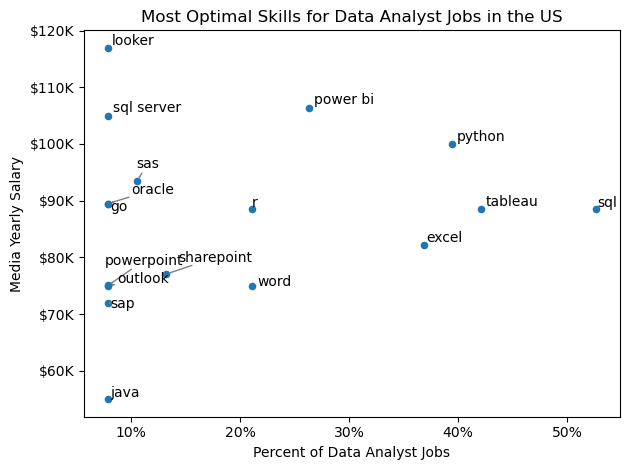

In [8]:
from adjustText import adjust_text
df_DA_skills_high_demand.plot(kind='scatter', x = 'skill_percent', y = 'median_salary')

text = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
   text.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(text, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))
    
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Media Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst Jobs in the US')
plt.tight_layout()
plt.show()

In [9]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['spss',
  'powerbi',
  'looker',
  'outlook',
  'sheets',
  'dax',
  'msaccess',
  'word',
  'microstrategy',
  'power bi',
  'sas',
  'ssis',
  'tableau',
  'datarobot',
  'visio',
  'excel',
  'splunk',
  'esquisse',
  'ssrs',
  'powerpoint',
  'cognos',
  'qlik',
  'alteryx',
  'sharepoint',
  'spreadsheet',
  'nuix',
  'sap',
  'ms access'],
 'programming': ['lua',
  'powershell',
  'c',
  'dart',
  'bash',
  'sass',
  'scala',
  'visual basic',
  'f#',
  'apl',
  'no-sql',
  'shell',
  'julia',
  'haskell',
  'mongo',
  'perl',
  'fortran',
  'go',
  'c#',
  'clojure',
  'python',
  'sas',
  'visualbasic',
  'java',
  't-sql',
  'matlab',
  'pascal',
  'ocaml',
  'cobol',
  'vba',
  'ruby',
  'groovy',
  'objective-c',
  'swift',
  'php',
  'golang',
  'mongodb',
  'lisp',
  'javascript',
  'css',
  'rust',
  'sql',
  'elixir',
  'solidity',
  'kotlin',
  'vb.net',
  'erlang',
  'nosql',
  'assembly',
  'c++',
  'html',
  'r',
  'delphi',
  'typescript',
  'crys

In [10]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['Technology', 'Skills'])

df_technology = df_technology.explode('Skills')

df_technology

,Technology,Skills
0,analyst_tools,spss
0,analyst_tools,powerbi
0,analyst_tools,looker
0,analyst_tools,outlook
0,analyst_tools,sheets
...,...,...
9,sync,google chat
9,sync,zoom
9,sync,symphony
9,sync,ringcentral


In [11]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='Skills')

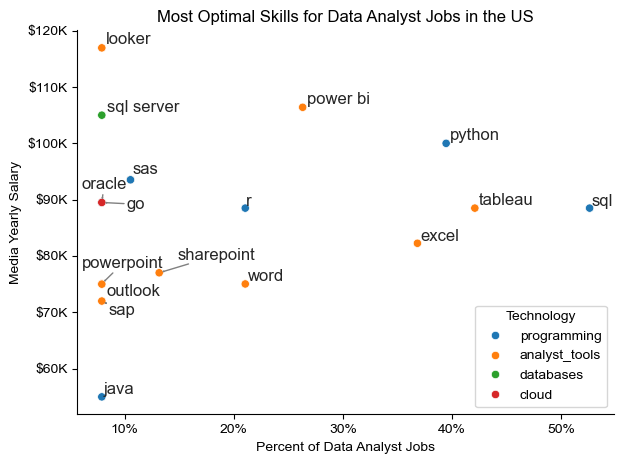

In [12]:
from adjustText import adjust_text
# df_plot.plot(kind='scatter', x = 'skill_percent', y = 'median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='Technology',
)

sns.despine()
sns.set_theme(style='ticks')

text = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
   text.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(text, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))
    
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Media Yearly Salary')
plt.title('Most Optimal Skills for Data Analyst Jobs in the US')
plt.tight_layout()
plt.show()